### Basic statistical analysis

Here we will look into some simple (univariate) dataset, and see how can we statistically describe the dataset.

In [1]:
# load python packages we will be using
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# some matplotlib configs
%matplotlib inline
plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.facecolor"] = "white"

In [2]:
# load our univariate height data using pandas
data = pd.read_csv("../datasets/height-weight.csv", usecols=[1])
print(data.head(10))

   Height(Inches)
0        65.78331
1        71.51521
2        69.39874
3        68.21660
4        67.78781
5        68.69784
6        69.80204
7        70.01472
8        67.90265
9        66.78236


In [3]:
# statistical summary using pandas describe method
print(data.describe())

       Height(Inches)
count    25000.000000
mean        67.993114
std          1.901679
min         60.278360
25%         66.704397
50%         67.995700
75%         69.272958
max         75.152800


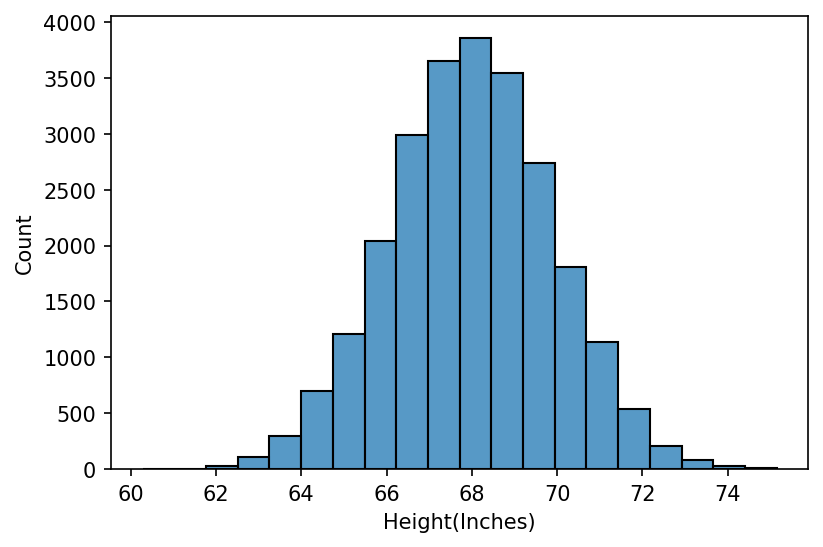

In [4]:
sns.histplot(data, x="Height(Inches)", bins=20)
plt.show()

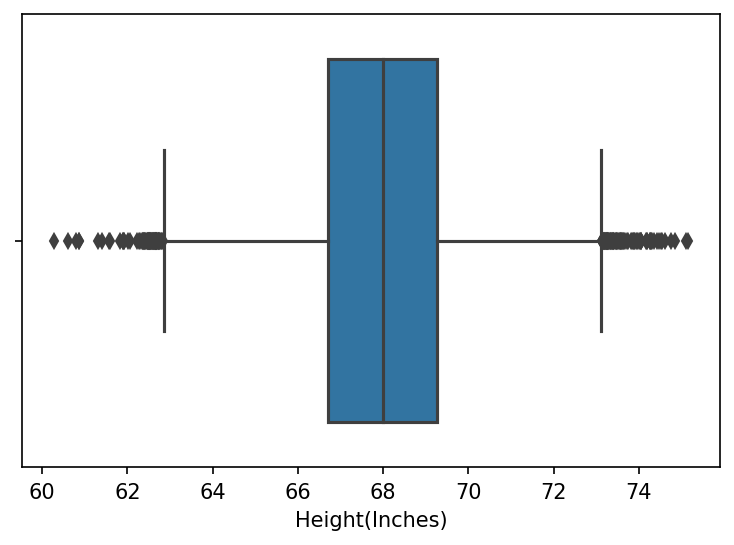

In [5]:
sns.boxplot(x=data["Height(Inches)"])
plt.show()

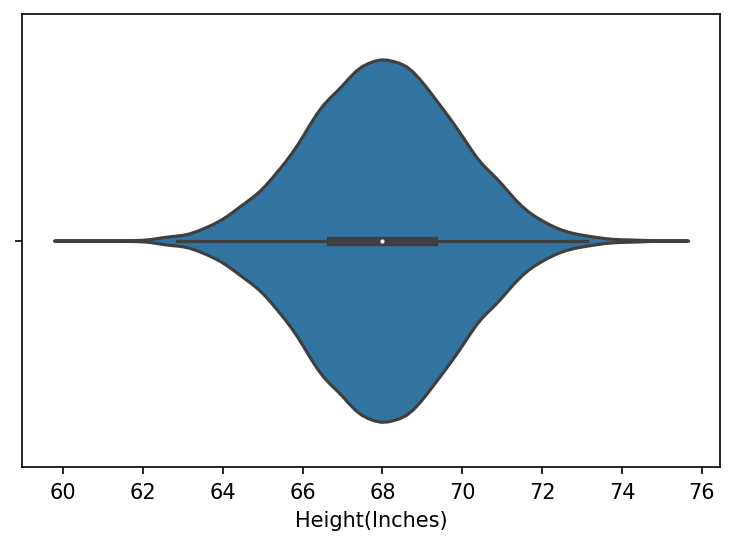

In [6]:
sns.violinplot(x=data["Height(Inches)"])
plt.show()

### Confidence interval

First let us calculate confidence interval for categorical dataset. In a study, the parents of toddlers were asked if they use toddler car seat during all travel. There was 659 participants in the study, with 85% said they travel with car seat.

In [7]:
p = 0.85
n = 659

z = 1.96 # for 95% confidence interval

std_err = np.sqrt((p * (1-p))/n)

In [8]:
lo_conf_bound = p - z * std_err
hi_conf_bound = p + z * std_err

print(lo_conf_bound, hi_conf_bound)

0.8227373256215749 0.8772626743784251


In [9]:
import statsmodels.api as sm

In [10]:
# statsmodels.stats.proportion.proportion_confint(count, nobs, alpha=0.05, method='normal')
# alpha is significance level = 1 - confidence level
sm.stats.proportion_confint(0.85*659, 659)

(0.8227378265796143, 0.8772621734203857)

Next have a look at the numerical dataset

In [11]:
df = pd.read_csv("../resources/UMstatspy/lab/course-2/week2/Cartwheeldata.csv")
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [12]:
df.describe()

,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,13.000000,28.240000,1.520000,0.560000,67.650000,66.260000,82.480000,0.76000,6.400000
std,7.359801,6.989754,0.509902,0.506623,4.431187,5.492647,15.058552,0.43589,2.533114
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.00000,2.000000
25%,7.000000,24.000000,1.000000,0.000000,64.000000,62.000000,70.000000,1.00000,4.000000
50%,13.000000,26.000000,2.000000,1.000000,68.000000,66.000000,81.000000,1.00000,6.000000
75%,19.000000,29.000000,2.000000,1.000000,71.000000,71.000000,92.000000,1.00000,8.000000
max,25.000000,56.000000,2.000000,1.000000,75.000000,76.000000,115.000000,1.00000,10.000000


In [13]:
# DescrStatsW.zconfint_mean(alpha=0.05, alternative='two-sided')
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()

(76.57715593233024, 88.38284406766977)